# 인공지능기초 3주차 실습(결과)

In [ ]:
import pandas as pd

In [ ]:
data_path = "https://raw.githubusercontent.com/ageron/data/refs/heads/main/housing/housing.csv"
df = pd.read_csv(data_path)

## 단계 1. 데이터 구조 훑어보기

### 1-1. 데이터프레임의 처음 몇 개의 행을 살펴보는 <code>head()</code>

<code>head()</code> 함수는 데이터프레임(DataFrame)의 처음 몇 개를 반환하는 함수다.<br>
<code>head()</code> 안에 숫자를 적어주면 그 수만큼의 행을 출력할 수 있고, 기본값은 5개다.

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


처음 3개의 항만 확인하고 싶을 때는 <code>n=3</code>를 입력할 수 있다.

In [ ]:
df.head(n=3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


### 1-2. 데이터프레임에 대한 간단한 정보를 확인하는 <code>info()</code>

데이터에 대한 간략한 설명과 **전체 행 수**, **각 특성의 데이터 타입**, **널(null)이 아닌 값의 개수** 등을 확인할 때는 데이터프레임의 <code>info()</code>를 사용할 수 있다.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


수치형 데이터인 다른 특성(feature)과 달리 <code>ocean_proximity</code>는 **문자열**이다(데이터프레임에서는 <code>object</code> 타입으로 나타난다).<br>
이 때, 모든 문자열이 임의의 값이지는 않고, 특정 범주(category) 중의 하나일 것이다.<br>
<code>ocean_proximity</code>는 정성 데이터(qualitative data) 중에서 범주형 데이터다.

### 1-3. 컬럼에서 카테고리별로 개수를 살펴보는 <code>value_counts()</code>

데이터프레임에서 특성명(또는 새로로 배열되었다는 의미에서 컬럼명)을 입력하면, 특정한 컬럼만 선택할 수 있다.<br>
이렇게 선택된 컬럼에서 <code>value_counts()</code>함수를 사용하면, 중복되지 않은 값이 몇 개 있는지 확인할 수 있다.

In [ ]:
df["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


예상할 수 있듯이 범주형 데이터가 아닌 연속형 수치 데이터를 갖는 컬럼에서 <code>value_counts()를 쓰면 의미있는 정보를 얻기는 힘들다.

In [ ]:
df["longitude"].value_counts()

,count
longitude,
-118.31,162
-118.30,160
-118.29,148
-118.27,144
-118.32,142
...,...
-114.47,1
-124.26,1
-123.13,1


개수 대신에 단순히 중복되지 않은 항목의 종류만 알고 싶을 때에는 <code>unique()</code>를 사용할 수 있다

In [ ]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

### 1-4. 수치형 특성의 요약정보를 보여주는 <code>describe()</code>

- count : 행의 개수
- mean : 수치형 특성의 평균값
- std : 수치형 특성의 표준편차
- min, max : 최소값과 최대값
- 25%, 50%, 75% : 제 1 사분위수, 중간값(median), 제 3 사분위수

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 1-5. 히스토그램을 그려주는 <code>hist()</code>

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

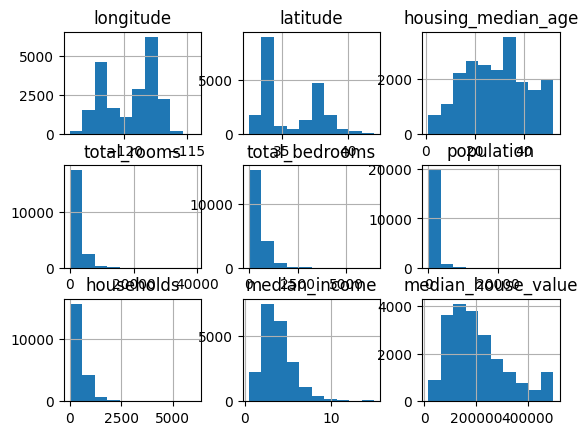

In [ ]:
df.hist()

위에서 보는 것처럼 설정값을 입력하지 않으면, 보기에 불편할 수 있다.
- bins : 히스토그램에 나타낼 구간의 수
- figsize : 히스토그램이 포함된 전체 그래프 이미지의 크기

이를 고려하여 <code>bins=50</code>, <code>figsize=(20, 15)</code>를 입력하여 히스토그램을 새로 그려본다.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

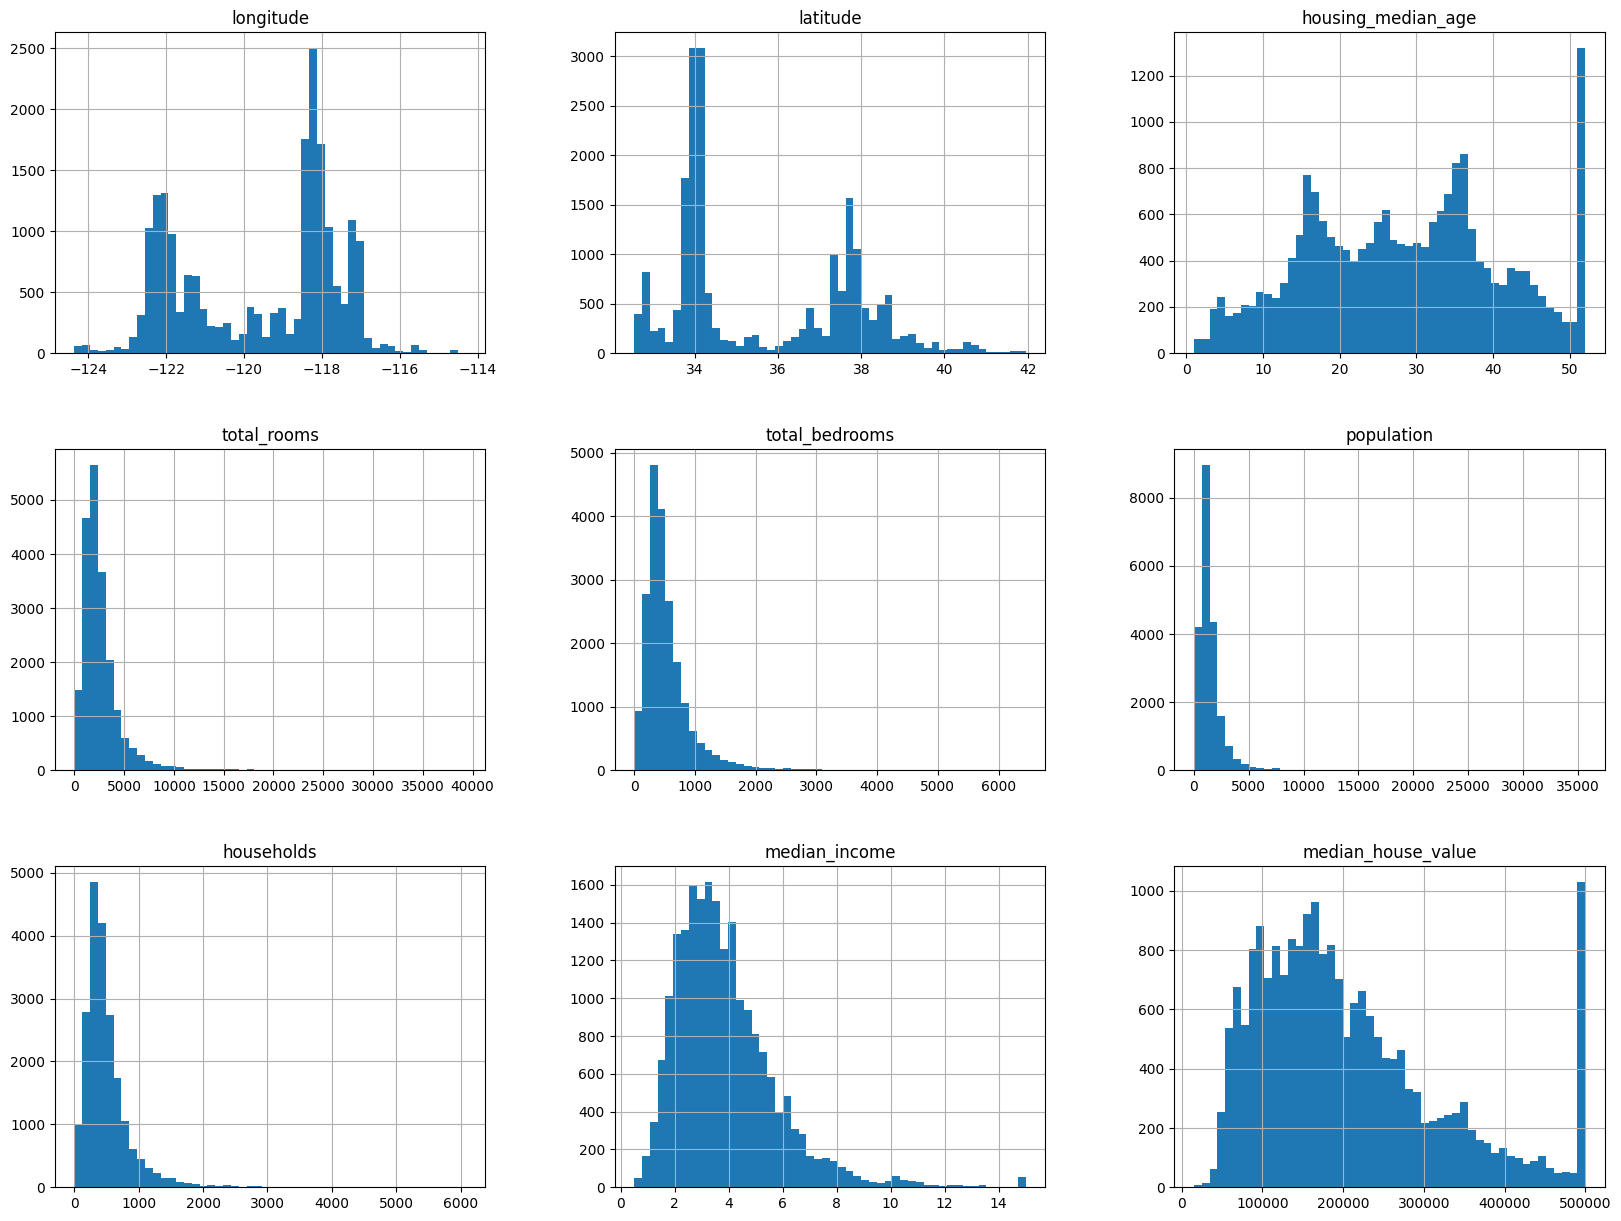

In [ ]:
df.hist(bins=50, figsize=(20, 15))

## 단계 2. 테스트셋 만들기

scikit-learn의 <code>train_test_split</code>을 사용하면, 원하는 비율만큼 테스트셋을 분할할 수 있다.<br>
- test_size : 테스트셋 분할 비율
- random_state : 초기 난수값 - 고정함으로써 계속 동일하게 분할 가능

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state=42)

In [ ]:
print(f"데이터셋의 총 레코드수: {len(df)}")
print(f"훈련셋의 레코드 수 : {len(train_set)}")
print(f"테스트셋의 레코드 수: {len(test_set)}")

데이터셋의 총 레코드수: 20640
훈련셋의 레코드 수 : 16512
테스트셋의 레코드 수: 4128


가장 간단한 방식의 데이터셋 분할인 <code>train_test_split</code>은 **무작위 샘플링** 이기 때문에, 때때로 특정 속성의 훈련 데이터와 테스트 데이터의 분포 비율이 다른 **샘플링 편향** 또는 **샘플링 잡음**이 생길 수 있다.

중위 소득을 의미하는 <code>median_income</code> 컬럼의 분포를 알아보기 위하여 히스토그램을 그려본다.

<Axes: >

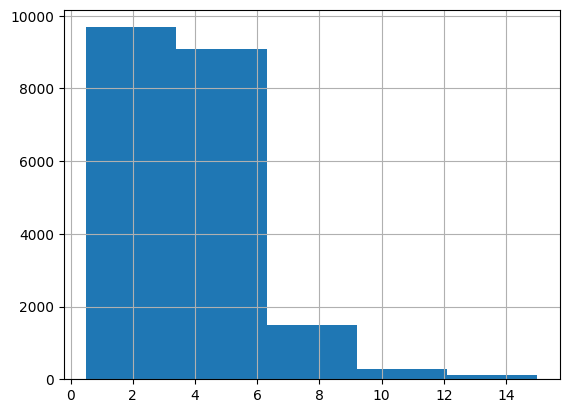

In [ ]:
df["median_income"].hist(bins = 5)

중위 소득을 연속된 값 대신에 다섯개의 구간으로 나누고, 각각에 독립적인 레이블을 부여한다.<br>
<code>pandas.cut()</code>함수를 이용한다.

In [ ]:
import numpy as np
df["income_category"] = pd.cut(df["median_income"],
                               bins=[0.0, 1.5, 3.0, 4.5, 6., np.inf ],
                               labels = [1, 2, 3, 4, 5])

다음과 같이 가운데 카테고리가 가장 많은 레코드를 갖는 형태로 값을 나눴다.

In [ ]:
df["income_category"].value_counts()

,count
income_category,
3,7236
2,6581
4,3639
5,2362
1,822


<Axes: >

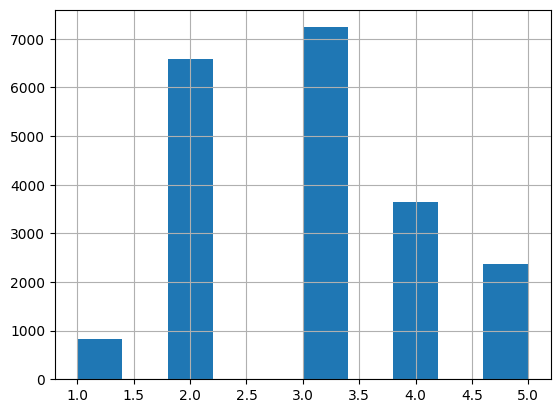

In [ ]:
df["income_category"].hist()

이제 <code>income_category</code>로 데이터셋을 분할했을 때, 훈련셋과 테스트셋의 특성별 비율을 비교해보려고 한다.<br>
원래 데이터프레임이 변경되지 않도록, 되도록이면 새로운 데이터프레임으로 복사해서 실행한다.

In [ ]:
df_new = df.copy()

우선, 이전과 동일하게 <code>train_test_split</code>으로 분할한다.

In [ ]:
new_train_set, new_test_set = train_test_split(df_new, test_size = 0.2, random_state=42)

히스토그램을 각각 그려본다. 하지만 그 비율이 어떠한지 알기 쉽지 않다.

<Axes: >

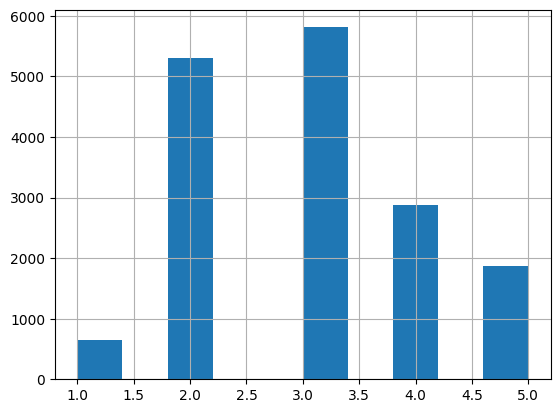

In [ ]:
new_train_set["income_category"].hist()

<Axes: >

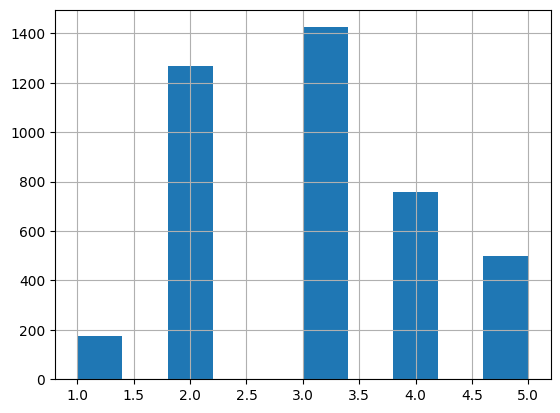

In [ ]:
new_test_set["income_category"].hist()

<code>income_category</code>의 비율이 **전체 데이터셋, 훈련셋, 테스트셋**에서 어떻게 변하는지 확인해본다.

In [ ]:
df_new["income_category"].value_counts() / len(df_new)

,count
income_category,
3,0.350581
2,0.318847
4,0.176308
5,0.114438
1,0.039826


In [ ]:
new_train_set["income_category"].value_counts() / len(new_train_set)

,count
income_category,
3,0.351926
2,0.321705
4,0.174358
5,0.112827
1,0.039184


In [ ]:
new_test_set["income_category"].value_counts() / len(new_test_set)

,count
income_category,
3,0.345203
2,0.307413
4,0.184109
5,0.120882
1,0.042393


이제 분할하려는 기준 카테고리의 비율이 유지되면서 데이터셋을 분할하는 **계층적 샘플링**을 진행해본다.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [ ]:
for train_idx, test_idx in sss.split(df_new, df_new["income_category"]):
    new2_train_set = df_new.loc[train_idx]
    new2_test_set = df_new.loc[test_idx]

이번에도 동일하게 <code>income_category</code>의 비율이 **전체 데이터셋, 훈련셋, 테스트셋**에서 어떻게 변하는지 확인해본다.

In [ ]:
df_new["income_category"].value_counts() / len(df_new)

,count
income_category,
3,0.350581
2,0.318847
4,0.176308
5,0.114438
1,0.039826


In [ ]:
new2_train_set["income_category"].value_counts() / len(new2_train_set)

,count
income_category,
3,0.350594
2,0.318859
4,0.176296
5,0.114462
1,0.039789


In [ ]:
new2_test_set["income_category"].value_counts() / len(new2_test_set)

,count
income_category,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


임의로 만든 <code>income_category</code>항목은 삭제하고, 계속 진행해본다.

In [ ]:
df.drop("income_category", axis= 1, inplace=True)

## 단계 3. 데이터 시각화

데이터 분석 및 시각화가 이번 수업의 목표가 아니므로, 제공된 코드를 통해 시각화 되는 방식을 살펴보는 것으로 충분하다.

<Axes: xlabel='longitude', ylabel='latitude'>

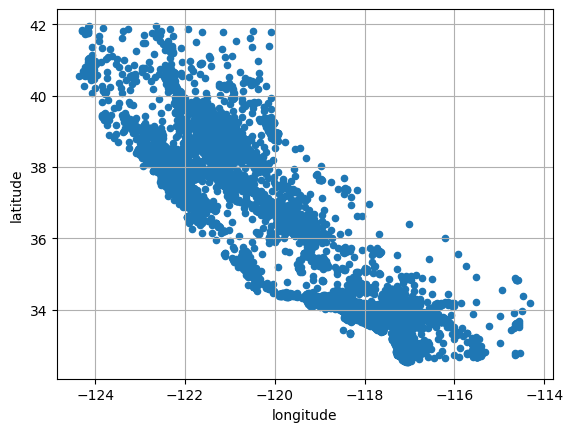

In [ ]:
df.plot(kind="scatter", x="longitude", y="latitude", grid=True)

<Axes: xlabel='longitude', ylabel='latitude'>

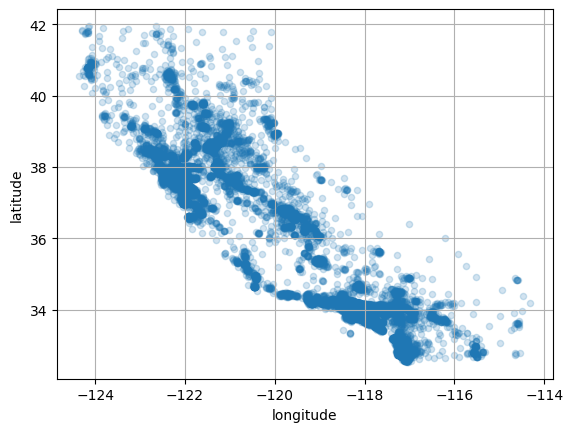

In [ ]:
df.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)

<Axes: xlabel='longitude', ylabel='latitude'>

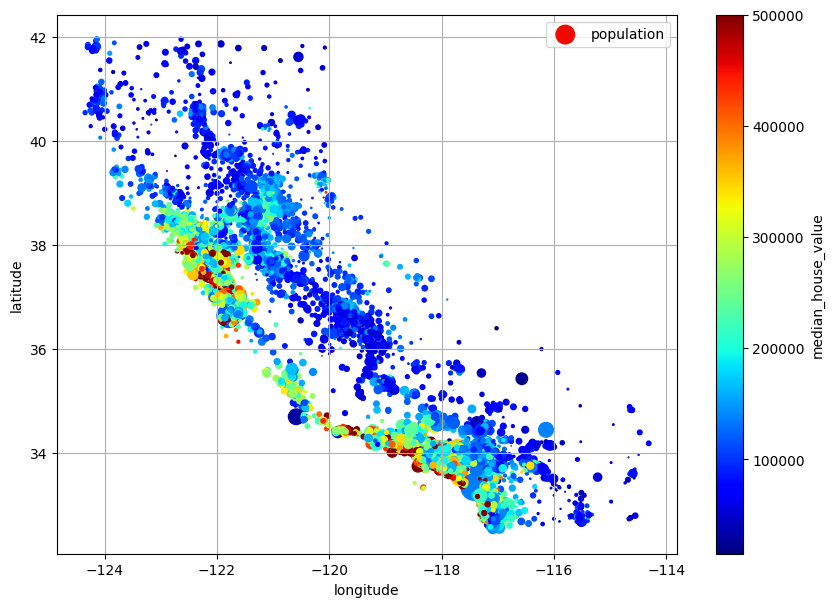

In [ ]:
df.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=df["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, figsize=(10, 7))

## 단계 4. 상관관계 분석

데이터프레임의 <code>corr</code>함수를 사용하면, 특성 간의 관련성을 알아볼 수 있다.<br>
이 때, 문자열 데이터는 상관관계 분석에서 제외해야하므로, <code>numeric_only=True</code> 옵션을 넣어준다.

In [ ]:
corr_df = df.corr(numeric_only=True)

In [ ]:
corr_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


여기에서 타겟변수로 예측하려하는 **median_house_value**와 다른 특성관의 상관관계를 확인해본다.

In [ ]:
corr_df["median_house_value"]

,median_house_value
longitude,-0.045967
latitude,-0.144160
housing_median_age,0.105623
total_rooms,0.134153
total_bedrooms,0.049686
population,-0.024650
households,0.065843
median_income,0.688075
median_house_value,1.000000


In [ ]:
corr_df["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


<Axes: xlabel='median_income', ylabel='median_house_value'>

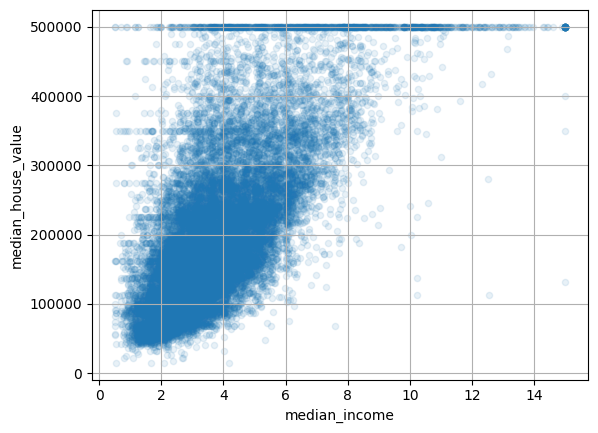

In [ ]:
df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)

## 단계 5. 새로운 특성 조합해보기

In [ ]:
df["rooms_per_house"] = df["total_rooms"] / df["households"]
df["bedrooms_ratio"] = df["total_bedrooms"] / df["total_rooms"]
df["people_per_house"] = df["population"] / df["households"]

In [ ]:
corr_df = df.corr(numeric_only=True)

In [ ]:
corr_df["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
rooms_per_house,0.151948
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
people_per_house,-0.023737
population,-0.024650
longitude,-0.045967


## 단계 6. 머신러닝 알고리즘 적용을 위한 데이터 전처리

In [ ]:
train_data = train_set.drop("median_house_value", axis=1)
train_label = train_set["median_house_value"].copy()

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,INLAND
...,...,...,...,...,...,...,...,...,...
11284,-122.37,37.94,49.0,969.0,229.0,599.0,195.0,1.3167,NEAR BAY
11964,-118.38,33.89,35.0,1778.0,330.0,732.0,312.0,6.5745,<1H OCEAN
5390,-119.33,36.28,16.0,2624.0,527.0,1077.0,520.0,2.1250,INLAND
860,-117.19,34.08,22.0,2467.0,555.0,1567.0,494.0,2.6536,INLAND


In [ ]:
train_label

,median_house_value
14196,291000.0
8267,156100.0
17445,353900.0
14265,241200.0
2271,53800.0
...,...
11284,71600.0
11964,379300.0
5390,104200.0
860,84700.0


### 단계 6-1. 데이터 정제

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16349 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [ ]:
train_set["total_bedrooms"].isnull().sum()

np.int64(163)

비교를 위하여, "total_bedrooms"가 빈값이 행들을 추출한다.

In [ ]:
null_rows_idx = df.isnull().any(axis=1)
df.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_ratio,people_per_house
182,-118.27,34.04,13.0,1784.0,NaN,2158.0,682.0,1.7038,118100.0,<1H OCEAN,2.615836,NaN,3.164223
327,-117.65,34.04,15.0,3393.0,NaN,2039.0,611.0,3.9336,151000.0,INLAND,5.553191,NaN,3.337152
366,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,271800.0,NEAR OCEAN,5.138418,NaN,3.211864
477,-117.99,34.14,30.0,2346.0,NaN,1988.0,474.0,2.5625,153000.0,INLAND,4.949367,NaN,4.194093
495,-114.59,34.83,41.0,812.0,NaN,375.0,158.0,1.7083,48500.0,INLAND,5.139241,NaN,2.373418


첫번째 가능한 전처리 방식은 결측치가 있는 데이터 행을 제거하는 것이다.

In [ ]:
df_opt1 = df.copy()

In [ ]:
df_opt1 = df_opt1.dropna(subset=["total_bedrooms"])

In [ ]:
df_opt1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_ratio,people_per_house


두번째 가능한 전처리 방식은 결측치가 있는 컬럼을 제거하는 것이다.

In [ ]:
df_opt2 = df.copy()

In [ ]:
df_opt2 = df_opt2.drop("total_bedrooms", axis=1)

In [ ]:
df_opt2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_ratio,people_per_house
182,-118.27,34.04,13.0,1784.0,2158.0,682.0,1.7038,118100.0,<1H OCEAN,2.615836,NaN,3.164223
327,-117.65,34.04,15.0,3393.0,2039.0,611.0,3.9336,151000.0,INLAND,5.553191,NaN,3.337152
366,-122.50,37.75,44.0,1819.0,1137.0,354.0,3.4919,271800.0,NEAR OCEAN,5.138418,NaN,3.211864
477,-117.99,34.14,30.0,2346.0,1988.0,474.0,2.5625,153000.0,INLAND,4.949367,NaN,4.194093
495,-114.59,34.83,41.0,812.0,375.0,158.0,1.7083,48500.0,INLAND,5.139241,NaN,2.373418


세번째 가능한 방식은 대표값 중 하나인 중간값으로 채워넣는 것이다.

In [ ]:
df_opt3 = df.copy()

In [ ]:
median = df_opt3["total_bedrooms"].median()

In [ ]:
df_opt3["total_bedrooms"].fillna(median, inplace=True)

/tmp/ipython-input-383473852.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_opt3["total_bedrooms"].fillna(median, inplace=True)


In [ ]:
df_opt2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_ratio,people_per_house
182,-118.27,34.04,13.0,1784.0,2158.0,682.0,1.7038,118100.0,<1H OCEAN,2.615836,NaN,3.164223
327,-117.65,34.04,15.0,3393.0,2039.0,611.0,3.9336,151000.0,INLAND,5.553191,NaN,3.337152
366,-122.50,37.75,44.0,1819.0,1137.0,354.0,3.4919,271800.0,NEAR OCEAN,5.138418,NaN,3.211864
477,-117.99,34.14,30.0,2346.0,1988.0,474.0,2.5625,153000.0,INLAND,4.949367,NaN,4.194093
495,-114.59,34.83,41.0,812.0,375.0,158.0,1.7083,48500.0,INLAND,5.139241,NaN,2.373418


### 단계 6-2. 범주형 데이터 다루기

In [ ]:
df_cat = df[["ocean_proximity"]]
df_cat.head()

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


범주형 특성을 순서형 변수로 치환하는 경우

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)

In [ ]:
df_cat_encoded

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

원핫 인코딩 벡터로 치환하는 경우

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
cat_encoder = OneHotEncoder()

In [ ]:
df_cat_1hot = cat_encoder.fit_transform(df_cat)

In [ ]:
df_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20640 stored elements and shape (20640, 5)>

In [ ]:
df_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]